In [13]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 100

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import requests

from os import listdir
import unicodedata

from paths import *
from scripts.manipulation import remove_acentos
from scripts.manipulation import normalize_cols
from scripts import scrap_data
from scripts import manipulation
from scripts import io
from scripts import vis_graphs

from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

import yaml


# LOAD and SAVE DATA from WORDMETERS

In [14]:
new_data, df_final = scrap_data.load_data()

In [15]:
new_data.sort_values(by='Confirmed', ascending=False).head(30).reset_index(drop=True)

,Date_last_updated_AEDT,date,countryname,Confirmed,Deaths,Recovered
0,6/04/2020 22:51,2020-06-04,0,6697763,393127,3244423
1,6/04/2020 22:51,2020-06-04,World,6697763,393127,3244423
2,6/04/2020 22:51,2020-06-04,US,1924051,110173,712252
3,6/04/2020 22:51,2020-06-04,Brazil,615870,34039,274997
4,6/04/2020 22:51,2020-06-04,Russia,441108,5384,204623
5,6/04/2020 22:51,2020-06-04,Spain,287740,27133,0
6,6/04/2020 22:51,2020-06-04,UK,281661,39904,0
7,6/04/2020 22:51,2020-06-04,Italy,234013,33689,161895
8,6/04/2020 22:51,2020-06-04,India,226713,6363,108450
9,6/04/2020 22:51,2020-06-04,Germany,184923,8736,167800


In [16]:
df_wordmeters = io.load_total_table()
df_wordmeters = manipulation.create_all_country_total_data(df_wordmeters, vars = ['confirmed','deaths','recovered','active'])


In [17]:
df_wordmeters.sort_values(by='confirmed', ascending=False).reset_index(drop=True)['countrycode'].unique()

array(['US', 'BR', 'RU', 'ES', 'UK', 'IT', 'IN', 'FR', 'DE', 'PE', 'TR',
       'IR', 'CL', 'MX', 'CA', 'SA', 'PK', 'CN', 'QA', 'BE', 'BD', 'NL',
       'BY', 'SE', 'EC', 'ZA', 'AE', 'SG', 'CO', 'PT', 'CH', 'KW', 'EG',
       'ID', 'UA', 'IE', 'PL', 'PH', 'AR', 'RO', 'DO', 'AF', 'JP', 'IL',
       'AT', 'PA', 'OM', 'BH', 'KZ', 'DK', 'KR', 'BO', 'RS', 'NG', 'AM',
       'DZ', 'MD', 'GH', 'IQ', 'NO', 'MY', 'MA', 'AU', 'FI', 'CM', 'AZ',
       'GT', 'HN', 'SD', 'DJ', 'LU', 'SN', 'GN', 'HU', 'UZ', 'CI', 'TH',
       'GA', 'GR', 'SV', 'NP', 'BA', 'BG', 'KE', 'HR', 'SO', 'CU', 'VE',
       'KG', 'EE', 'MV', 'IS', 'LK', 'LT', 'ET', 'SK', 'NZ', 'SI', 'GQ',
       'LB', 'AL', 'CR', 'NI', 'ZM', 'TN', 'PY', 'LV', 'NE', 'CY', 'BF',
       'AD', 'UY', 'TD', 'GE', 'MR', 'JO', 'SM', 'MT', 'CG', 'JM', 'TZ',
       'PS', 'TG', 'TW', 'RW', 'BJ', 'VN', 'ME', 'LR', 'MN', 'GY', 'BN',
       'KH', 'TT', 'BS', 'MC', 'BB', 'LI', 'SR', 'BT', 'GM', 'AG', 'LC',
       'FJ', 'VA', 'SC'], dtype=object)

## European Centre for Disease Prevention and Contro

https://data.europa.eu/euodp/en/data/dataset/covid-19-coronazvirus-data

In [18]:
# df_eucenter = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')
# dd = manipulation.manipulate_eucenter(df_eucenter)

### Generate Graphs for Multiple Countrys

In [19]:
df = df_wordmeters.copy()

codes = ['BR','IT','ES','US','CN','KR','DE','FR','UK','IN', 'TR','MX','RU']
mask_countrys = df['countrycode'].isin(codes)

In [20]:
from scripts import vis_layout
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)

themes = themes['all_countrys']
for var in themes['vars'].keys():
    for scale in themes['axis_legend']['scale'].keys():
        fig = vis_graphs.all_countrys(df[mask_countrys], var, scale, themes, save=False)
        
#         plot(fig, filename=f"../images/multipleCountry/{var}_{scale}.html", auto_open=False)
        plot(fig, filename=f"../../sample_pages/pages/covid-19/images/multipleCountry/{var}_{scale}.html", auto_open=False)


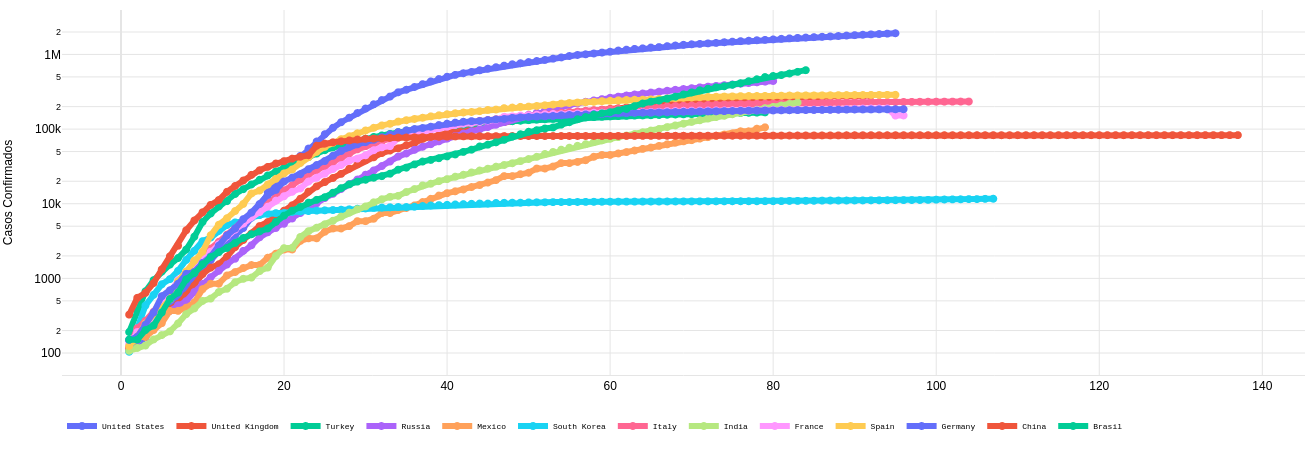

In [21]:
fig

## By Country

In [22]:
df = df_wordmeters.copy()

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['unique_country_daily']

codes = ['BR','IT','ES','US','CN','KR','DE','FR','UK','IN', 'TR','MX','RU']

# codes =['BR']
for countrycode in codes:
    mask = ((df['countrycode']==countrycode) & (df['confirmed']>0))
    fig = vis_graphs.unique_country(df[mask],themes)
#     plot(fig, filename=f"../images/singleCountry/{countrycode}.html", auto_open=False)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/singleCountry/{countrycode}_daily.html", auto_open=False)


themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['unique_country_cum']
# codes =['BR']
for countrycode in codes:
    mask = ((df['countrycode']==countrycode) & (df['confirmed']>0))
    fig = vis_graphs.unique_country(df[mask],themes)
#     plot(fig, filename=f"../images/singleCountry/{countrycode}.html", auto_open=False)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/singleCountry/{countrycode}_cum.html", auto_open=False)


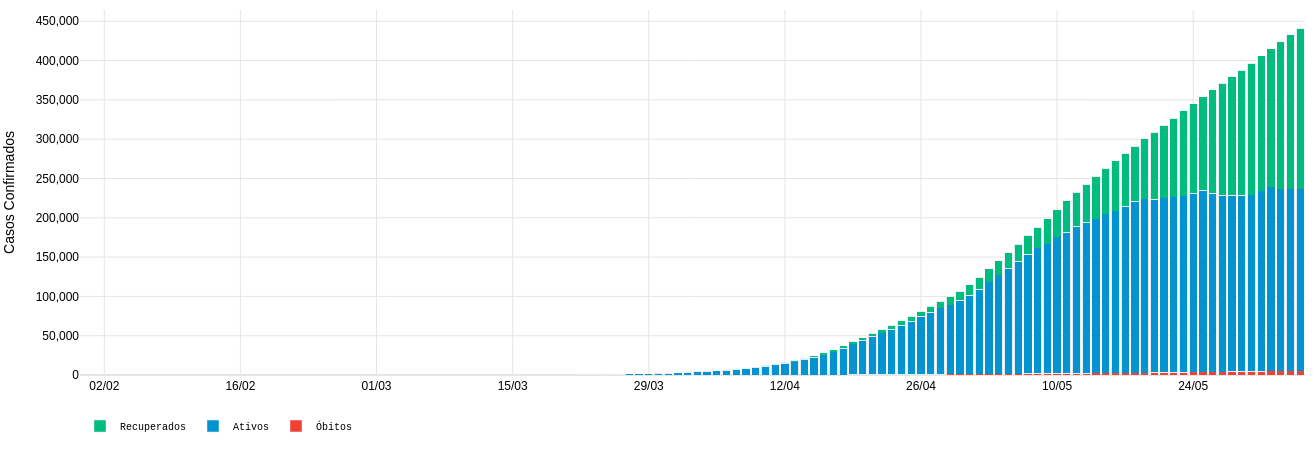

In [23]:
fig

## Estados

In [26]:
from scripts.io import read_sheets
from scripts import manipulation
config = yaml.load(open('../configs/config.yaml', 'r'), Loader=yaml.FullLoader)

io.update_ms_data()



df = pd.read_csv("../data/ministerio_da_saude/last_data_ms_covid19.csv")

df_states = manipulation.manipule_mytable(df,config['ms_table'])

print("States table, Done!")

downloaded
renamed
saved
States table, Done!


In [27]:
df_states.head()

,regiao,state,date,new_confirmed,confirmed,new_deaths,deaths,last_update,city
100,Brasil,BRASIL,2020-06-04,30925.0,614941,1473.0,34021,2020-06-04 22:54,BRASIL
100,Brasil sem SP,BRASIL SEM SP,2020-06-04,25208.0,485741,1189.0,25461,2020-06-04 22:54,BRASIL SEM SP
2120,Sudeste,SP,2020-06-04,5717.0,129200,284.0,8560,2020-06-04 22:54,SP
2019,Sudeste,RJ,2020-06-04,1692.0,60932,317.0,6327,2020-06-04 22:54,RJ
1110,Nordeste,CE,2020-06-04,3739.0,59795,208.0,3813,2020-06-04 22:54,CE


## Multiple

In [28]:
from scripts import vis_graphs

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['brasil_vis_cumulative']

for var in themes['vars'].keys():
    for scale in themes['axis_legend']['scale'].keys():
        fig = vis_graphs.brasil_vis_cum(df_states, var,scale, themes)
        
        plot(fig, filename=f"../../sample_pages/pages/covid-19/images/brasil/cumulative/{var}_{scale}.html", auto_open=False)


## Diario

In [29]:
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['brasil_vis_daily']

codes = df_states['state'].unique()

for state in codes:
    mask = ((df_states['state']==state) & (df_states['confirmed']>0))
    fig = vis_graphs.unique_country(df_states[mask], themes)

    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/brasil/daily/{state}_daily.html", auto_open=False)
    
    
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['brasil_vis_cum']


for state in codes:
    mask = ((df_states['state']==state) & (df_states['confirmed']>0))
    fig = vis_graphs.unique_country(df_states[mask], themes)

    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/brasil/daily/{state}_cum.html", auto_open=False)

## Cidades

In [30]:
from scripts import io

brio, brio_raw = io.load_brasilIO()

print("Br.IO table, Done!")

Br.IO table, Done!


In [31]:
### Load Cities
cities = io.load_cities(brio_raw)

In [32]:
cities.tail()

,date,city,confirmed,new_confirmed,deaths,new_deaths
257,2020-05-28,São José dos Campos,794.0,67.0,34.0,1.0
258,2020-05-29,São José dos Campos,842.0,48.0,36.0,2.0
259,2020-05-30,São José dos Campos,842.0,0.0,36.0,0.0
260,2020-05-31,São José dos Campos,842.0,0.0,36.0,0.0
261,2020-06-01,São José dos Campos,890.0,48.0,37.0,1.0


## Multiple Cities

In [33]:
from scripts import vis_graphs

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['cities']

for var in themes['vars'].keys():
    for scale in themes['axis_legend']['scale'].keys():
        fig = vis_graphs.brasil_vis_cum(cities, var,scale, themes)
        
        plot(fig, filename=f"../../sample_pages/pages/covid-19/images/vale/cumulative/{var}_{scale}.html", auto_open=False)


## Diario


In [34]:
import unidecode

themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['cities_vis_daily']

codes = ['São Paulo', 'Taubaté', 'São José dos Campos']

for state in codes:
    mask = ((cities['city']==state) & (cities['confirmed']>0))
    fig = vis_graphs.unique_country(cities[mask], themes)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/vale/daily/{unidecode.unidecode(state.replace(' ','_').lower())}_daily.html", auto_open=False)

    
themes = yaml.load(open('../themes/sample_pages.yaml', 'r'), Loader=yaml.FullLoader)
themes = themes['cities_vis_cum']
for state in codes:
    mask = ((cities['city']==state) & (cities['confirmed']>0))
    fig = vis_graphs.unique_country(cities[mask], themes)
    plot(fig, filename=f"../../sample_pages/pages/covid-19/images/vale/daily/{unidecode.unidecode(state.replace(' ','_').lower())}_cum.html", auto_open=False)
    print(unidecode.unidecode(state.replace(' ','_').lower()))

sao_paulo
taubate
sao_jose_dos_campos


### Figures to UP

In [35]:
# from scripts import io

# f1_name = 'total_lin.html'
# f2_name = 'mortes_lin.html'
# f3_name = 'brasil_lin_total.html'
# f4_name = 'brasil_lin_mortes.html'
# # f5_name = "brasil_por_estado_confirmed.html"
# # f6_name = "brasil_por_estado_deaths.html"

# f1_path = f"../images/multipleCountry/{f1_name}"
# f2_path = f"../images/multipleCountry/{f2_name}"
# f3_path = f"../images/singleCountry/{f3_name}"
# f4_path = f"../images/singleCountry/{f4_name}"
# # f5_path = f"../images/brasil/{f5_name}"
# # f6_path = f"../images/brasil/{f6_name}"

# names_paths = {f1_name:f1_path,
#          f2_name:f2_path,
#          f3_name:f3_path,
#          f4_name:f4_path
#               }
# #          f5_name:f5_path,
# #          f6_name:f6_path}

# for name in names_paths.keys():
    
#     io.to_storage(bucket='sv-covid19',
#               bucket_folder='brasil',
#               file_name=name,
#               path_to_file=names_paths[name])